#ML team 1 - Regression models

##1. Description:
The goals of this study are to identify regression models for [team 1 dataset](https://github.com/OmdenaAI/ankara-turkey-student-success/blob/main/src/tasks/task-2-EDA/EDA-Team-1/Final-notebook/Data/Final-data.csv) that predict the target variable (Gavg) accurately (def. of Gavg is given below) and interpret the results. In this study, I will compare the performances of Linear Regression, XGBoost, Random Forest, and Support Vector Machines models.   

#### **Features - Schema**
#####A. [Final-data.csv](https://github.com/OmdenaAI/ankara-turkey-student-success/blob/main/src/tasks/task-2-EDA/EDA-Team-1/Final-notebook/Data/Final-data.csv)
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

 *(G1, G2, G3) grades are related with the course subject, Math or Portuguese:*
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)
34. Subject (numeric: 0, 1, Portuguese and Math respectively)

#####B. [Preprocessed-data.csv](https://github.com/OmdenaAI/ankara-turkey-student-success/blob/main/src/tasks/task-2-EDA/EDA-Team-1/Final-notebook/Final-Data/Preprocessed-Data.csv)

1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
5. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
6. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
7. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
8. activities - extra-curricular activities (binary: yes or no)
9. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
10. health - current health status (numeric: from 1 - very bad to 5 - very good)
11. absences - number of school absences (numeric: from 0 to 93)
12. Subject (numeric: 0, 1, Portuguese and Math respectively)
13. Final score - 0.3 * G1 + 0.3 * G2 + 0.4 * G3 (numeric: from 0 to 20)
14. ses_status - derived from Medu, Fedu, Mjob, Fjob, famsize, address, Pstatus, guardian, schoolsup, famsup, paid, higher, internet, nursery (ordinal: 'Low', 'Medium', 'High')
15. avg_alc - (Dalc + Walc) / 2
16. social_score_category - famrel * 0.15 + goout * 0.5 + romantic * 0.35

In [13]:
# data manipulation
import numpy as np
import pandas as pd

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,\
                                  OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
#regression models
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import SGDRegressor, ElasticNet, BayesianRidge
#from lightgbm import LGBMRegressor
import xgboost as xgb #to use cv
from xgboost.sklearn import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.kernel_ridge import KernelRidge
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV, cross_val_score
#understanding model results
try:
  import shap
except:
  !pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 10.1 MB/s eta 0:00:00


In [15]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
t1_path = "/content/drive/MyDrive/OneDrive/papers/Research/ComputerScience_AI/data_science/Omdena/predict_students_success/data/team1/"
df_full=pd.read_csv(t1_path+"Final-data.csv")

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1044 non-null   int64 
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

In [ ]:
df_full.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,1


##2. Data preparation

1. *Dalc and Walc will be replaced by their average (avg_alc).*
2. *(G1, G2, G3) will be replaced by 0.3 * G1 + 0.3 * G2 + 0.4 * G3 (Gavg). This is the target variable.*

In [5]:
X = df_full.drop(['Unnamed: 0','Dalc','Walc','G1','G2','G3'], axis=1)
X['avg_alc'] = df_full[['Dalc','Walc']].mean(axis=1)
y = 0.3*df_full['G1'] + 0.3*df_full['G2'] + 0.4*df_full['G3']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1044 non-null   int64  
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

In [ ]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,Subject,avg_alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,6,1,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,1,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,10,1,2.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,2,1,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,1,1.5


In [ ]:
y.head()

0     5.7
1     5.4
2     8.5
3    14.7
4     8.8
dtype: float64

In [7]:
# Break off test set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [8]:
# Select categorical columns
cat_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]

# Select numerical columns
num_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [9]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

##3. Model training

In [10]:
def mltrain_score(model, score_method, preprocessor=preprocessor, X_train=X_train, y_train=y_train, cv_folds=5):
  # Bundle preprocessing and modeling code in a pipeline
  my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)
                                ])
  scores = cross_val_score(my_pipeline, X_train, y_train, cv=cv_folds, scoring=score_method)
  train_score = scores.mean()
  print(score_method, '(train) = ', train_score)

def mltest_score(model, score_method, preprocessor=preprocessor, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
  my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)
                                ])
  my_pipeline.fit(X_train, y_train)
  preds = my_pipeline.predict(X_test)
  if score_method == 'r2':
    test_score = r2_score(y_test, preds)
  elif score_method == 'neg_root_mean_squared_error':
    test_score = -1 * mean_squared_error(y_test, preds, squared=False)
  elif score_method == 'neg_mean_absolute_error':
    test_score = -1 * mean_absolute_error(y_test, preds)
  else:
    test_score = None
  print(score_method, '(test) = ', test_score)


###3.1 Linear Regression

In [ ]:
lr1 = LinearRegression()

In [ ]:
mltrain_score(lr1, 'r2')
mltrain_score(lr1, 'neg_root_mean_squared_error')

r2 (train) =  0.2473929535246792
neg_root_mean_squared_error (train) =  -2.8146667047714855


In [ ]:
mltest_score(lr1, 'r2')
mltest_score(lr1, 'neg_root_mean_squared_error')

r2 (test) =  0.1629954679582587
neg_root_mean_squared_error (test) =  -2.9953551438250203


###3.2 XGBoost

In [ ]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=6,
 seed=42)

In [ ]:
#mltrain_score(xgb1, 'r2')
mltrain_score(xgb1, 'neg_root_mean_squared_error')
#mltest_score(xgb1, 'r2')
mltest_score(xgb1, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.719940179598745
neg_root_mean_squared_error (test) =  -2.6729456455084093


In [ ]:
xgb2 = XGBRegressor(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=6,
 seed=42)

mltrain_score(xgb2, 'neg_root_mean_squared_error')
mltest_score(xgb2, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.7196797758121907
neg_root_mean_squared_error (test) =  -2.6549879238990903


In [ ]:
xgb3 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=3,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=6,
 seed=42)

mltrain_score(xgb3, 'neg_root_mean_squared_error')
mltest_score(xgb3, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.745454644504903
neg_root_mean_squared_error (test) =  -2.6929417272286327


In [ ]:
xgb4 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=2000,
 max_depth=8,
 min_child_weight=1,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=6,
 seed=42)

mltrain_score(xgb4, 'neg_root_mean_squared_error')
mltest_score(xgb4, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.6713831297953323
neg_root_mean_squared_error (test) =  -2.614657774530647


In [11]:
xgb4 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=2000,
 max_depth=8,
 min_child_weight=1,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=6,
 seed=42)

mltrain_score(xgb4, 'neg_mean_absolute_error')
mltest_score(xgb4, 'neg_mean_absolute_error')

neg_mean_absolute_error (train) =  -2.044382243184986
neg_mean_absolute_error (test) =  -1.9632226727225564


In [ ]:
xgb5 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=2000,
 max_depth=20,
 min_child_weight=1,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=6,
 seed=42)

mltrain_score(xgb5, 'neg_root_mean_squared_error')
mltest_score(xgb5, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.6833470180520105
neg_root_mean_squared_error (test) =  -2.650877732618041


RMSE(test) =  2.624842092952892


Text(0, 0.5, 'Feature Importance Score')

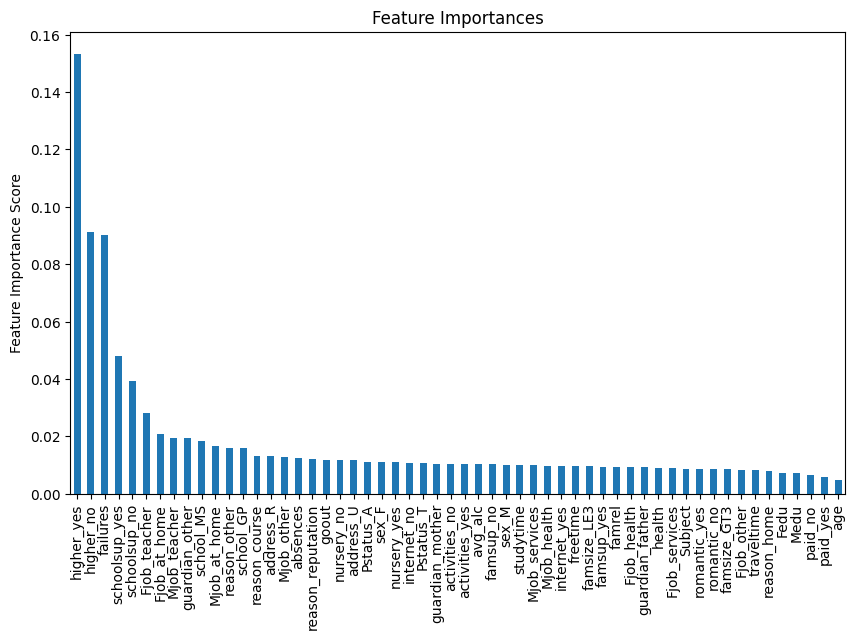

In [17]:
#Plot feature importances for xgb4
xgb4 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=2000,
 max_depth=8,
 min_child_weight=1,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=6,
 seed=42)
#Since pipeline does not have feature_importances_ attribute, need to start from one-hot encoding again
X_train2 = pd.get_dummies(X_train)
X_test2 = pd.get_dummies(X_test)

xgb4.fit(X_train2, y_train)
pred4 = xgb4.predict(X_test2)
print('RMSE(test) = ', mean_squared_error(y_test, pred4, squared=False)) #check the error again to verify consistency
plt.figure(figsize=(10,6))
feat_imp = pd.Series(xgb4.feature_importances_, index=X_train2.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [26]:
feat_imp_index=feat_imp.index.tolist()

####SHAP plot

In [18]:
explainer = shap.TreeExplainer(xgb4)
shap_values = explainer.shap_values(X_train2)

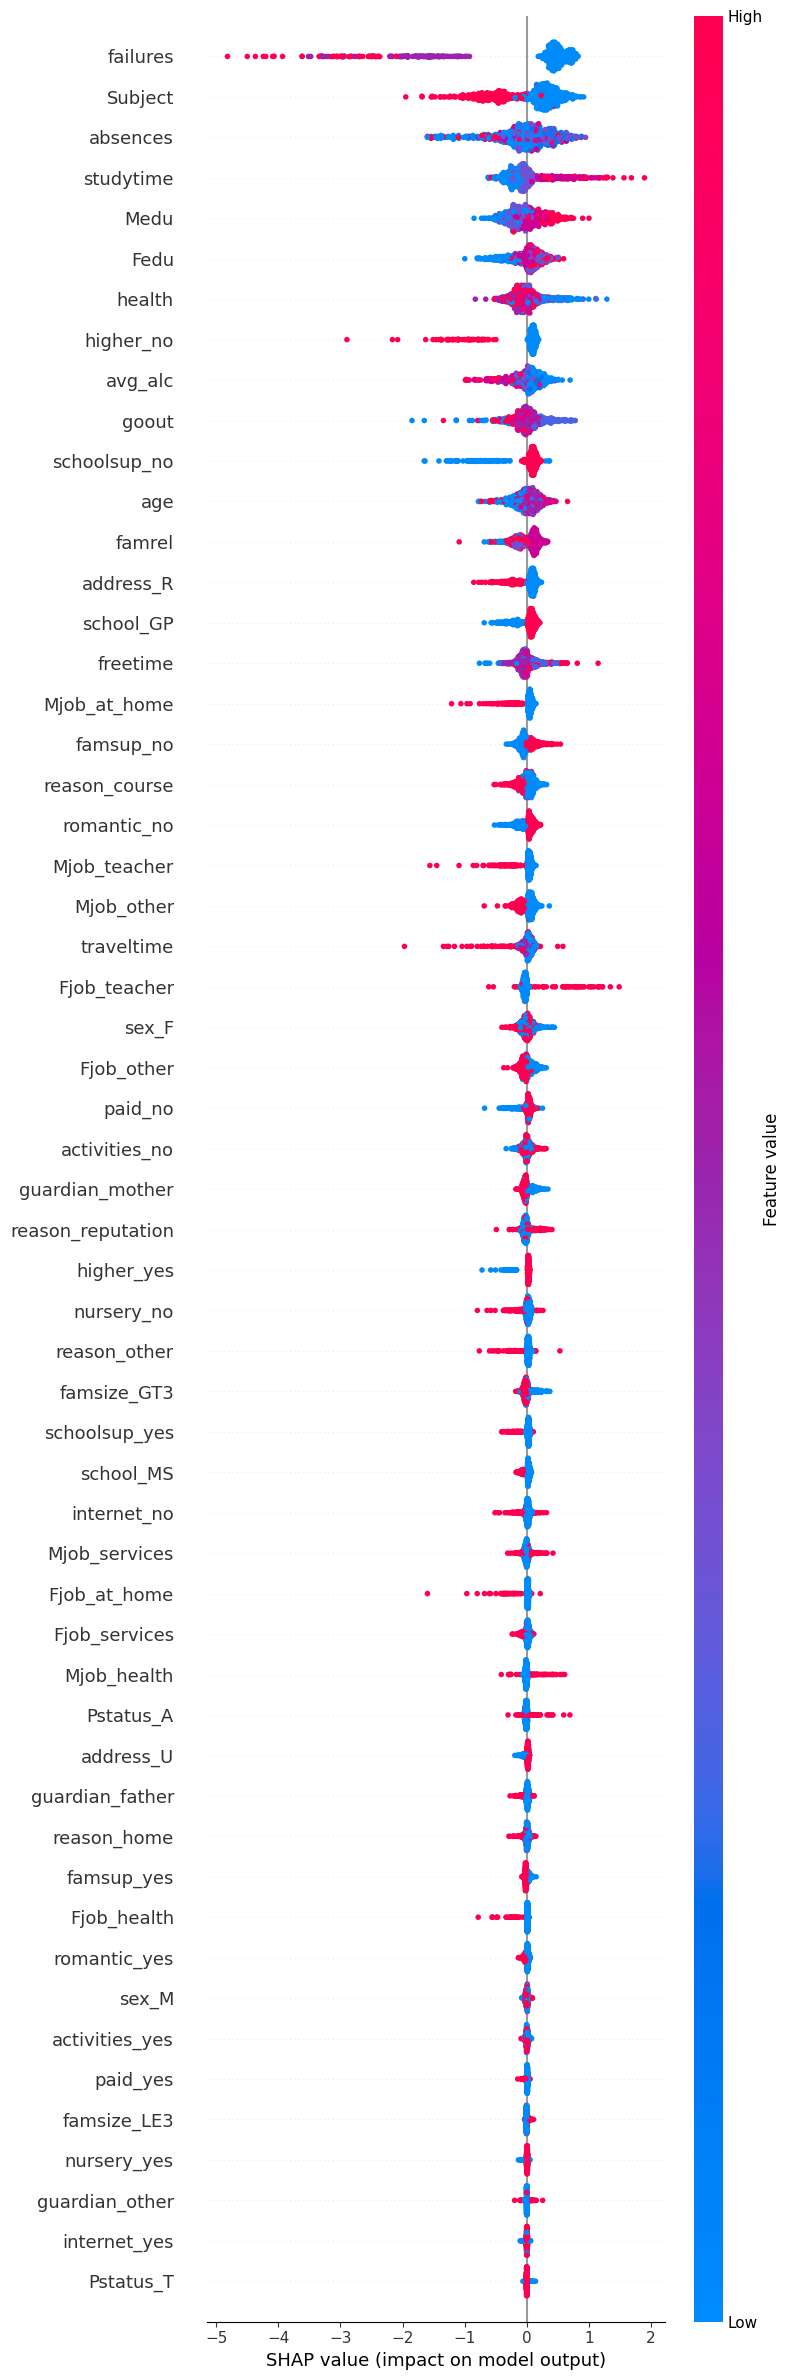

In [31]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train2, max_display=60)

###3.3 Random Forest

In [ ]:
def rf(nt):
  return RandomForestRegressor(n_estimators=nt, random_state=42)

In [ ]:
mltrain_score(rf(200), 'neg_root_mean_squared_error')
mltest_score(rf(200), 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.6479182956708183
neg_root_mean_squared_error (test) =  -2.8407389698345824


In [ ]:
mltrain_score(rf(500), 'neg_root_mean_squared_error')
mltest_score(rf(500), 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.643529319503326
neg_root_mean_squared_error (test) =  -2.838750743501805


In [ ]:
mltrain_score(rf(2000), 'neg_root_mean_squared_error')
mltest_score(rf(2000), 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.6431456442714163
neg_root_mean_squared_error (test) =  -2.84499355558844


###3.4 Support Vector Machines

In [ ]:
svr1=SVR(C=1.0, epsilon=0.1)
mltrain_score(svr1, 'neg_root_mean_squared_error')
mltest_score(svr1, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.769707559308906
neg_root_mean_squared_error (test) =  -2.841578084350107


In [ ]:
svr2=SVR(C=1.0, epsilon=0.3)
mltrain_score(svr2, 'neg_root_mean_squared_error')
mltest_score(svr2, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.763020034359971
neg_root_mean_squared_error (test) =  -2.834671460824694


In [ ]:
svr3=SVR(C=1.0, epsilon=0.05)
mltrain_score(svr3, 'neg_root_mean_squared_error')
mltest_score(svr3, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.771505915272318
neg_root_mean_squared_error (test) =  -2.842591861470541


In [ ]:
svr4=SVR(C=1.0, epsilon=0.7)
mltrain_score(svr4, 'neg_root_mean_squared_error')
mltest_score(svr4, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.753824916852705
neg_root_mean_squared_error (test) =  -2.833114435259083


In [ ]:
svr5=SVR(C=1.0, epsilon=1.0)
mltrain_score(svr5, 'neg_root_mean_squared_error')
mltest_score(svr5, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.7523451300968276
neg_root_mean_squared_error (test) =  -2.8464705576873803


In [ ]:
svr6=SVR(C=1.0, epsilon=2.0)
mltrain_score(svr6, 'neg_root_mean_squared_error')
mltest_score(svr6, 'neg_root_mean_squared_error')

neg_root_mean_squared_error (train) =  -2.7735345871489345
neg_root_mean_squared_error (test) =  -2.880011578682267


In [ ]:
for eps in np.arange(0.6,0.8,0.05):
  print("epsilon=",eps)
  mltrain_score(SVR(C=1.0, epsilon=eps), 'neg_root_mean_squared_error')
  mltest_score(SVR(C=1.0, epsilon=eps), 'neg_root_mean_squared_error')

epsilon= 0.6
neg_root_mean_squared_error (train) =  -2.755166225004531
neg_root_mean_squared_error (test) =  -2.8306824298641113
epsilon= 0.65
neg_root_mean_squared_error (train) =  -2.754335690170015
neg_root_mean_squared_error (test) =  -2.8313774584380926
epsilon= 0.7000000000000001
neg_root_mean_squared_error (train) =  -2.753824916852705
neg_root_mean_squared_error (test) =  -2.833114435259083
epsilon= 0.7500000000000001
neg_root_mean_squared_error (train) =  -2.7528939844309646
neg_root_mean_squared_error (test) =  -2.8344847867355245
epsilon= 0.8000000000000002
neg_root_mean_squared_error (train) =  -2.752072584576235
neg_root_mean_squared_error (test) =  -2.8366769540176393


##4. Conclusion

The best model is the XGBoost model (see xgb4), with RMSE(test)=2.61, and MAE(test)=2.0. Other models (Random Forest, SVR) have similar errors (RMSE(test) are around 2.8). As we already expected from EDA, linear model has worst performance since the grades do not depend on the features linearly in this dataset.

From the feature importances plot of xgb4, we can see that the students' grades are substantially depend on whether they want to pursue higher education. The next most important factor is the number of past class failures (not surprising). Whether or not the students receive the extra education support also influence their grades significantly (students who have extra support perform worse). Furthermore, the students whose fathers are teachers tend to perform better. This is consistent with our observations in the EDA phase.

I find these ML predictions are highly unsatisfactory (quantitatively) as the minimum error is still quite close to the standard deviation of the grades (standard deviation of G1 is about 3.0).